In [ ]:
#importing required libraries
from PIL import Image
import os
import sys
import csv

In [ ]:
#importing required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
import torch
import torchvision
import cv2
from torch.utils.data import DataLoader,Dataset
import pandas as pd
from torchvision import datasets, transforms

In [ ]:
#importing required libraries
from torchvision import models
from torch import optim
import torch.nn as nn

In [ ]:
device=torch.device('cuda:0')#Setting the runtime to GPU

In [ ]:
#Setting the transforms
mean = (0.485,0.484,0.442)
std = (0.229,0.224,0.224)
transform = transforms.Compose([
                  transforms.RandomResizedCrop(size=256),
                  transforms.RandomRotation(degrees=15),
                  transforms.RandomHorizontalFlip(),
                  transforms.ToTensor(),
                  transforms.Normalize(mean,std)
])

In [ ]:
#pytorch custom dataset function to load custom dataset
class CustomDataset(Dataset):

  def __init__(self,csv_file, root_dir, transform=None):
    self.annotations = pd.read_csv(csv_file)
    self.root_dir = root_dir
    self.transform = transform

  def __len__(self):
    return len(self.annotations)

  def __getitem__(self, index):
    y_label = torch.tensor(int(self.annotations.iloc[index,-1]))
    img_path = os.path.join(self.root_dir, self.annotations.iloc[index,1])
    image = Image.open(img_path)
    

    if self.transform:
      image = self.transform(image)

    return (image, y_label)

In [ ]:
!unzip data.zip #unzipping the test data

Archive:  data.zip
   creating: data/
  inflating: data/hacker.zip         


In [ ]:
!unzip /content/data/hacker.zip

Archive:  /content/data/hacker.zip
   creating: hacker/
   creating: hacker/toddler/
  inflating: hacker/toddler/18.jpeg  
  inflating: hacker/toddler/16.jpeg  
  inflating: hacker/toddler/15.jpeg  
  inflating: hacker/toddler/17.jpeg  
  inflating: hacker/toddler/47.jpeg  
  inflating: hacker/toddler/46.jpeg  
  inflating: hacker/toddler/48.jpeg  
  inflating: hacker/toddler/active-child-playing-kitchen-260nw-298079099.jpg  
  inflating: hacker/toddler/49.jpeg  
  inflating: hacker/toddler/istockphoto-856952888-612x612.jpg  
  inflating: hacker/toddler/34.jpeg  
  inflating: hacker/toddler/istockphoto-1069933778-612x612.jpg  
  inflating: hacker/toddler/istockphoto-1072315292-612x612.jpg  
  inflating: hacker/toddler/50.jpeg  
  inflating: hacker/toddler/52.jpeg  
  inflating: hacker/toddler/istockphoto-969921038-612x612.jpg  
  inflating: hacker/toddler/istockphoto-1056360056-612x612.jpg  
  inflating: hacker/toddler/istockphoto-844057720-612x612.jpg  
  inflating: hacker/toddler/ist

In [ ]:
#Reading image and loading the path into list
# default format can be changed as needed
def createFileList(myDir, format='.jpg'):
    fileList = []
    print(myDir)
    for root, dirs, files in os.walk(myDir, topdown=False):
        for name in files:
            if name.endswith(format):
                fullName = os.path.join(root, name)
                fileList.append(fullName)
    return fileList

# load the original image
myFileList = createFileList('/content/hacker/Adult')


/content/hacker/Adult


In [ ]:
#Creating dataframe for adult category and label is '0'.
df=pd.DataFrame()
df['image']=myFileList
df['label']=[0 for i in range(len(df['image']))]

In [ ]:
df

,image,label
0,/content/hacker/Adult/istockphoto-871624818-61...,0
1,/content/hacker/Adult/istockphoto-1069131934-6...,0
2,/content/hacker/Adult/istockphoto-605763388-61...,0
3,/content/hacker/Adult/istockphoto-945439872-61...,0
4,/content/hacker/Adult/istockphoto-945958058-61...,0
...,...,...
329,/content/hacker/Adult/istockphoto-1092747784-6...,0
330,/content/hacker/Adult/istockphoto-638494402-61...,0
331,/content/hacker/Adult/istockphoto-658448764-61...,0
332,/content/hacker/Adult/istockphoto-1071915542-6...,0


In [ ]:
#Reading image and loading the path into list using above function
myFileList1 = createFileList('/content/hacker/teenager')

/content/hacker/teenager


In [ ]:
#Creating dataframe for teenager category and label is '1'.
df1=pd.DataFrame()
df1['image']=myFileList1
df1['label']=[1 for i in range(len(df1['image']))]

In [ ]:
df1

,image,label
0,/content/hacker/teenager/istockphoto-855227512...,1
1,/content/hacker/teenager/istockphoto-106955987...,1
2,/content/hacker/teenager/istockphoto-105792369...,1
3,/content/hacker/teenager/istockphoto-541117484...,1
4,/content/hacker/teenager/istockphoto-912931870...,1
...,...,...
350,/content/hacker/teenager/istockphoto-641755172...,1
351,/content/hacker/teenager/istockphoto-109274778...,1
352,/content/hacker/teenager/istockphoto-104752885...,1
353,/content/hacker/teenager/istockphoto-846739188...,1


In [ ]:
#Reading image and loading the path into list using above function
myFileList2 = createFileList('/content/hacker/toddler')

/content/hacker/toddler


In [ ]:
#Creating dataframe for toddler category and label is '2'.
df2=pd.DataFrame()
df2['image']=myFileList2
df2['label']=[2 for i in range(len(df2['image']))]

In [ ]:
#Cancat three dataframes(Adult,Toddler and teenager) into one dataframe and generate csv file
d=pd.concat([df,df1,df2])
d.to_csv('/content/data.csv')

In [ ]:
#Loading into custom dataset
dataset = CustomDataset('/content/data.csv','/content/hacker', transform=transform)

In [ ]:
len(dataset)#Dataset size

974

In [ ]:
#Defining the size of train and test for splitting
train_size = int(0.8 * 974)
test_size = 974 - train_size

In [ ]:
trainset, testset = torch.utils.data.random_split(dataset, [train_size, test_size]) # Splitting the dataset into train & test

In [ ]:
trainloader = DataLoader(trainset, batch_size=32, shuffle=True)  # Creating dataloader for training


In [ ]:
testloader = DataLoader(testset, batch_size=32, shuffle=True)#test data

In [ ]:
#Checking the shapes of images and labels
images, labels = iter(trainloader).next()
print(images.shape)
print(labels.shape)
print(labels)

torch.Size([32, 3, 256, 256])
torch.Size([32])
tensor([0, 2, 0, 2, 1, 2, 2, 0, 0, 0, 1, 1, 2, 0, 0, 1, 0, 2, 0, 0, 1, 2, 1, 1,
        2, 0, 2, 1, 0, 2, 0, 1])


In [ ]:
#Initializing vgg16 and printing the model
m=models.vgg16()
print(m)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
#Changing the out classes into 3 because we have three classes
def create_model1(n_classes):
  model = models.vgg19(pretrained=True)
  
  n_features = model.classifier[6].in_features

  model.classifier = nn.Sequential(
     nn.Linear(in_features=25088, out_features=4096, bias=True),
     nn.ReLU(inplace=True),
     nn.Dropout(p=0.5, inplace=False),
     nn.Linear(in_features=4096, out_features=4096, bias=True),
     nn.ReLU(inplace=True),
     nn.Dropout(p=0.5, inplace=False),
     nn.Linear(n_features, out_features=500, bias=True),
     nn.ReLU(inplace=True),
     nn.Linear(in_features=500, out_features=n_classes, bias=True),
  )
  return model

In [ ]:
#Calling the function and print required model
m=create_model1(3).to(device)
print(m)

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth



VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), pad

In [ ]:
#defining the evaluation for our model
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels =inputs.to(device), labels.to(device)
        outputs = m(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [ ]:
#Setting the optimiser and loss function
opt = optim.SGD(m.parameters(),lr=0.003,momentum=0.8)
loss_fn = nn.CrossEntropyLoss()

Epoch: 0/15, Test acc: 38.97, Train acc: 38.38
Epoch: 1/15, Test acc: 46.15, Train acc: 45.70
Epoch: 2/15, Test acc: 53.85, Train acc: 47.50
Epoch: 3/15, Test acc: 54.87, Train acc: 60.46
Epoch: 4/15, Test acc: 52.31, Train acc: 52.37
Epoch: 5/15, Test acc: 50.26, Train acc: 56.23
Epoch: 6/15, Test acc: 54.36, Train acc: 63.03
Epoch: 7/15, Test acc: 66.67, Train acc: 67.52
Epoch: 8/15, Test acc: 64.62, Train acc: 70.47
Epoch: 9/15, Test acc: 59.49, Train acc: 65.47
Epoch: 10/15, Test acc: 57.95, Train acc: 60.46
Epoch: 11/15, Test acc: 61.03, Train acc: 67.65
Epoch: 12/15, Test acc: 63.08, Train acc: 71.63
Epoch: 13/15, Test acc: 64.62, Train acc: 72.66
Epoch: 14/15, Test acc: 59.49, Train acc: 65.73


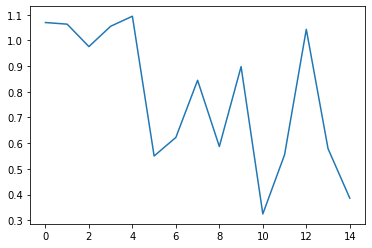

CPU times: user 11min 18s, sys: 5min 15s, total: 16min 33s
Wall time: 16min 33s


In [ ]:
#Training our model and plotting the loss
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 15
     
for epoch in range(max_epochs):
     
  for i, data in enumerate(trainloader, 0):
     
    inputs, labels = data
    inputs, labels =inputs.to(device), labels.to(device)
    opt.zero_grad()
     
    outputs = m(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()  
    del inputs,labels,outputs
    torch.cuda.empty_cache()
    loss_arr.append(loss.item())
        
  loss_epoch_arr.append(loss.item())
         
  print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))

plt.plot(loss_epoch_arr)
plt.show()

Test data

In [ ]:
!unzip /content/test.zip #unzipping test data

Archive:  /content/test.zip
   creating: Test Data/
  inflating: Test Data/Img1038.jpg   
  inflating: Test Data/Img1248.jpg   
  inflating: Test Data/Img1077.jpg   
  inflating: Test Data/Img1279.jpg   
  inflating: Test Data/Img3606.jpg   
  inflating: Test Data/Img3669.jpg   
  inflating: Test Data/Img1382.jpg   
  inflating: Test Data/Img5182.jpg   
  inflating: Test Data/Img1071.jpg   
  inflating: Test Data/Img1186.jpg   
  inflating: Test Data/Img1628.jpg   
  inflating: Test Data/Img1444.jpg   
  inflating: Test Data/Img5578.jpg   
  inflating: Test Data/Img5128.jpg   
  inflating: Test Data/Img5245.jpg   
  inflating: Test Data/Img1448.jpg   
  inflating: Test Data/Img3740.jpg   
  inflating: Test Data/Img1288.jpg   
  inflating: Test Data/Img3247.jpg   
  inflating: Test Data/Img2924.jpg   
  inflating: Test Data/Img2967.jpg   
  inflating: Test Data/Img1073.jpg   
  inflating: Test Data/Img7130.jpg   
  inflating: Test Data/Img2216.jpg   
  inflating: Test Data/Img1951.jpg  

In [ ]:
test_list= createFileList('/content/test') #image path for test images

/content/test


In [ ]:
label=['Adults','Teenagers','Toddler'] #creating labels

In [ ]:
y=[]

In [ ]:
#Opening very image and predicting outputs
for i in test_list:
  img=Image.open(i)
  img_trans = transform(img)
  image= img_trans.unsqueeze(0).to(device)
  result = m(image)
  y_=torch.argmax(result,axis=1)
  y_=int(np.asarray(y_[0].cpu()))
  y.append(label[y_])

In [ ]:
len(y)

314

In [ ]:
#Generating csv file for submission
li=os.listdir('/content/test')
sub=pd.DataFrame()
sub['Filename']=[i for i in li]
sub['Category']=[i for i in y]

In [ ]:
sub.to_csv('/content/19.csv',index=False)